In [ ]:
#Before running the code.
#make sure to have .env file in the same directory and the variable names are the same as what we have been
#using in class

In [226]:
#import libraries 
#loads the env file with api info
from dotenv import load_dotenv
import os
#for making api requests
import requests
#for making dataframes
import pandas as pd
#for creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for slowing down requests
import time
import numpy as np

In [1]:
load_dotenv("3510-Copy1.env")

NameError: name 'load_dotenv' is not defined

In [171]:
#requesting access token
clientID = os.getenv("SPOTIFY_CLIENT_ID")
clientSecret = os.getenv("SPOTIFY_CLIENT_SECRET")
grantType = "client_credentials"
bodyParams = {"grant_type":grantType}
url = "https://accounts.spotify.com/api/token/"
response = requests.post(url, data=bodyParams, auth = (clientID, clientSecret)).json()

In [172]:
response

{'access_token': 'BQDbrYZIjapwwxFKid-sNDrHKGezwGDriDWxgmC-gD25SJT7E7VdUNHnDCeWHAkhFObYNTRTIaiHK5Mtg1O9Ib3pVeLvtIqgukozVOpO6p8RIbEjxbQ',
 'token_type': 'Bearer',
 'expires_in': 3600}

In [173]:
headers = {"Authorization":"Bearer "+response["access_token"]} 

rootURL = "https://api.spotify.com/v1/"

In [87]:
#MF DOOM artist request
doomReq = requests.get(rootURL+"search?q=MFDOOM&type=artist",headers=headers).json()
doomReq

{'artists': {'href': 'https://api.spotify.com/v1/search?query=MFDOOM&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2pAWfrd7WFF3XhVt9GooDL'},
    'followers': {'href': None, 'total': 2355188},
    'genres': ['alternative hip hop',
     'east coast hip hop',
     'hip hop',
     'instrumental hip hop'],
    'href': 'https://api.spotify.com/v1/artists/2pAWfrd7WFF3XhVt9GooDL',
    'id': '2pAWfrd7WFF3XhVt9GooDL',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb1ca139a174e216880498dc16',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab676161000051741ca139a174e216880498dc16',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f1781ca139a174e216880498dc16',
      'width': 160}],
    'name': 'MF DOOM',
    'popularity': 73,
    'type': 'artist',
    'uri': 'spotify:artist:2pAWfrd7WFF3XhVt9GooDL'},
   {'external_urls': {'spot

In [88]:
doomReq["artists"]["items"][2]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3IZVDB8rcinQTKxCjvMag6'},
 'followers': {'href': None, 'total': 880},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/3IZVDB8rcinQTKxCjvMag6',
 'id': '3IZVDB8rcinQTKxCjvMag6',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b273b5caa24ab172ea23f01c4443',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e02b5caa24ab172ea23f01c4443',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d00004851b5caa24ab172ea23f01c4443',
   'width': 64}],
 'name': 'DOOM',
 'popularity': 20,
 'type': 'artist',
 'uri': 'spotify:artist:3IZVDB8rcinQTKxCjvMag6'}

In [15]:
#grab MF DOOM's artist id
doomID = doomReq["artists"]["items"][0]["id"]
doomID

'2pAWfrd7WFF3XhVt9GooDL'

In [32]:
#Request for all albums
albumsReq = requests.get(rootURL+"artists/"+doomID+"/albums",headers=headers, params={"limit":50}).json()

In [35]:
for album in albumsReq["items"]:
    print(album["name"],album["id"])

Key to the Kuffs (Redux) 2oVtB1xKrul4yhgQGdT4I0
Super What? 4odeNH2Qe9DAxT3sC1qq9p
NEHRUVIANDOOM (REDUX) 5XrsB0YjsgEftjA9etarsL
BORN LIKE THIS (Redux) 6NhLXvyDG7QbCqFDFHh9ja
Czarface Meets Metal Face 2PPvDD3t985MvMphfSwzgr
Czarface Meets Metal Face (Instrumentals) 0baxtwETSL9uVjKBb6e4qw
Bookhead 21lAbpuWxW2fnSvqAmDtNn
Key to the Kuffs 3AEeWRPtSMeqoXL8xNcSbe
Rae Dawn / Change the Beat 7g3pWxHA5OH0swOV1bU10h
Gazzillion Ear 68Yu0AOZVnBmkOeDntlico
BORN LIKE THIS 2XfBjZ0ZwKMfwYJDX0JR1O
Madvillainy 2: The Madlib Remix 2tFoLuLmgTgwFS0P9RVvew
Metal Fingers Presents: Special Herbs, The Box Set Vol. 0 - 9 3QiZaIVgSMuznmUNLPMG8t
THE MOUSE & THE MASK 6TgkNOiJxeSkVVbXV720B1
Special Herbs + Spices Volume One 63fFCsXmRWP5Spr06X83Tb
Four Tet Remixes 1lBlWsgSwzxUObEwzRTCP3
MM...FOOD 1UcS2nqUhxrZjrBZ3tHk2N
Madvillainy 19bQiwEKhXUBJWY6oV3KZk
Metal Fingers Presents: Special Herbs Vol. 5 & 6 1AJtMVPbKTiw7OHOa9oVCx
Metal Fingers Presents: Special Herbs, Vol. 7 and 8 1DXZRrTbmTQSjyIkJV5CEe
Metal Fingers Pres

In [155]:
#hand-picked the albums I wanted to analyze and put the name and Id in this dictionary
albumsDict = {
    'Super What?': '4odeNH2Qe9DAxT3sC1qq9p',
    'Czarface Meets Metal Face': '2PPvDD3t985MvMphfSwzgr',
    'Key to the Kuffs': '3AEeWRPtSMeqoXL8xNcSbe',
    'Rae Dawn / Change the Beat': '7g3pWxHA5OH0swOV1bU10h',
    'BORN LIKE THIS': '2XfBjZ0ZwKMfwYJDX0JR1O',
    'Madvillainy 2: The Madlib Remix': '2tFoLuLmgTgwFS0P9RVvew',
    'THE MOUSE & THE MASK': '6TgkNOiJxeSkVVbXV720B1',
    'MM...FOOD': '1UcS2nqUhxrZjrBZ3tHk2N',
    'Madvillainy': '19bQiwEKhXUBJWY6oV3KZk',
    'Vaudeville Villain': '7HPjcPD2cr8E5oHvVAmBp7',
    'Black Bastards (Deluxe Edition)': '2c1HbILCmMdS1LigScTWc8',
    'Operation: Doomsday (Complete)': '5bjUbZPVTEQcb6W3LquX1E',
}

In [176]:
#this function takes an albumrequest and the feature ("danceability, energy, etc") as parameters and then returns
#the average of the feature for all the songs in the album
#looking back I realize I could have accomplished this by using the pandas function .describe 
def albumAverages(album, feature):
    average = 0
    for song in album["tracks"]["items"]:
        songId = song["id"]
        featureReq = requests.get(rootURL+"audio-features?ids="+songId, headers= headers).json()
        featureNum = featureReq["audio_features"][0][feature]
        average += featureNum
        time.sleep(2)
    average = average/len(album["tracks"]["items"])
    return average

In [157]:
#creating a list of album requests for the albums I picked out before
albumRequests = []
for key, value in albumsDict.items():
    albumId = value
    doomAlbumReq = requests.get(rootURL+"albums/"+albumId,headers=headers).json()
    albumRequests.append(doomAlbumReq)

In [158]:
len(albumRequests)

12

In [159]:
#created a dictionary that will hold data to be turned into dataframe
albumAnalytics = {
    "Album Name": [],
    "Release Date":["2021","2018","2012","2003","2009","2008","2005","2004","2004","2003","2000","1999"],
    "danceability" :[],
    "energy":[],
    "loudness":[],
    "valence":[],
    "tempo":[],
    "speechiness":[],
    "instrumentalness":[]
}
for key in albumsDict:
    albumAnalytics["Album Name"].append(key)
albumAnalytics

{'Album Name': ['Super What?',
  'Czarface Meets Metal Face',
  'Key to the Kuffs',
  'Rae Dawn / Change the Beat',
  'BORN LIKE THIS',
  'Madvillainy 2: The Madlib Remix',
  'THE MOUSE & THE MASK',
  'MM...FOOD',
  'Madvillainy',
  'Vaudeville Villain',
  'Black Bastards (Deluxe Edition)',
  'Operation: Doomsday (Complete)'],
 'Release Date': ['2021',
  '2018',
  '2012',
  '2003',
  '2009',
  '2008',
  '2005',
  '2004',
  '2004',
  '2003',
  '2000',
  '1999'],
 'danceability': [],
 'energy': [],
 'loudness': [],
 'valence': [],
 'tempo': [],
 'speechiness': [],
 'instrumentalness': []}

In [178]:
#this list will be iterated through to get averages of all features for all albums
analysisElements = ["danceability","energy","loudness","valence","tempo","speechiness","instrumentalness"]

In [161]:
#this loops through all the album requests, gets the averages of each feature for each album, and then appends them
#to their respective lists in the dictionary
for album in albumRequests:
    for i in analysisElements:
        average = albumAverages(album,i)
        albumAnalytics[i].append(average)
        time.sleep(2)
albumAnalytics

KeyError: 'audio_features'

In [163]:
albumAnalytics

{'Album Name': ['Super What?',
  'Czarface Meets Metal Face',
  'Key to the Kuffs',
  'Rae Dawn / Change the Beat',
  'BORN LIKE THIS',
  'Madvillainy 2: The Madlib Remix',
  'THE MOUSE & THE MASK',
  'MM...FOOD',
  'Madvillainy',
  'Vaudeville Villain',
  'Black Bastards (Deluxe Edition)',
  'Operation: Doomsday (Complete)'],
 'Release Date': ['2021',
  '2018',
  '2012',
  '2003',
  '2009',
  '2008',
  '2005',
  '2004',
  '2004',
  '2003',
  '2000',
  '1999'],
 'danceability': [0.6056999999999999,
  0.6986250000000002,
  0.5466666666666667,
  0.7371428571428572,
  0.5917142857142857,
  0.53412,
  0.6401875,
  0.6035999999999999,
  0.4800000000000001,
  0.6565882352941177,
  0.7477812500000001,
  0.6495476190476192],
 'energy': [0.7465999999999998,
  0.5460625,
  0.6753333333333332,
  0.5008571428571428,
  0.7122857142857143,
  0.6601599999999999,
  0.6929374999999999,
  0.7554666666666667,
  0.7495909090909091,
  0.6978823529411764,
  0.7504062499999999,
  0.6598809523809523],
 'loudn

In [167]:
analyticsDf = pd.DataFrame(albumAnalytics)
analyticsDf

,Album Name,Release Date,danceability,energy,loudness,valence,tempo,speechiness,instrumentalness
0,Super What?,2021,0.605700,0.746600,-6.138600,0.624200,124.594700,0.322400,0.000057
1,Czarface Meets Metal Face,2018,0.698625,0.546063,-10.206938,0.518500,113.887438,0.337119,0.120325
2,Key to the Kuffs,2012,0.546667,0.675333,-8.940467,0.469400,96.782067,0.298733,0.049080
3,Rae Dawn / Change the Beat,2003,0.737143,0.500857,-9.454571,0.664857,97.027429,0.435700,0.105700
4,BORN LIKE THIS,2009,0.591714,0.712286,-6.640190,0.636857,115.468571,0.352962,0.089943
5,Madvillainy 2: The Madlib Remix,2008,0.534120,0.660160,-9.162440,0.557280,97.366680,0.332224,0.061640
6,THE MOUSE & THE MASK,2005,0.640188,0.692937,-7.317500,0.658875,110.370750,0.329425,0.001186
7,MM...FOOD,2004,0.603600,0.755467,-6.962467,0.753000,104.546800,0.330000,0.000369
8,Madvillainy,2004,0.480000,0.749591,-8.702955,0.603091,111.435318,0.324564,0.071758
9,Vaudeville Villain,2003,0.656588,0.697882,-8.247824,0.617941,102.184706,0.308624,0.048928


In [166]:
#deleting the last album since there were too many requests to do all the albums at once
for key in albumAnalytics:
    if(len(albumAnalytics[key])>= 12):
        albumAnalytics[key] = albumAnalytics[key][:-1]

In [175]:
#this request is for the last album of the list "Operation Doomsday" so I can add it back into the dataframe
oneAlbumReq = requests.get(rootURL+"albums/5bjUbZPVTEQcb6W3LquX1E",headers=headers).json()

In [177]:
albumAnalytics["Album Name"].append("Operation Doomsday")
albumAnalytics["Release Date"].append("1999")

In [179]:
#this is the same as the loop before but just for this last album, adding Operation Doomsday to the dictionary
for i in analysisElements:
        average = albumAverages(oneAlbumReq,i)
        albumAnalytics[i].append(average)
        time.sleep(2)

In [180]:
albumAnalytics

{'Album Name': ['Super What?',
  'Czarface Meets Metal Face',
  'Key to the Kuffs',
  'Rae Dawn / Change the Beat',
  'BORN LIKE THIS',
  'Madvillainy 2: The Madlib Remix',
  'THE MOUSE & THE MASK',
  'MM...FOOD',
  'Madvillainy',
  'Vaudeville Villain',
  'Black Bastards (Deluxe Edition)',
  'Operation Doomsday'],
 'Release Date': ['2021',
  '2018',
  '2012',
  '2003',
  '2009',
  '2008',
  '2005',
  '2004',
  '2004',
  '2003',
  '2000',
  '1999'],
 'danceability': [0.6056999999999999,
  0.6986250000000002,
  0.5466666666666667,
  0.7371428571428572,
  0.5917142857142857,
  0.53412,
  0.6401875,
  0.6035999999999999,
  0.4800000000000001,
  0.6565882352941177,
  0.7477812500000001,
  0.6495476190476192],
 'energy': [0.7465999999999998,
  0.5460625,
  0.6753333333333332,
  0.5008571428571428,
  0.7122857142857143,
  0.6601599999999999,
  0.6929374999999999,
  0.7554666666666667,
  0.7495909090909091,
  0.6978823529411764,
  0.7504062499999999,
  0.6598809523809523],
 'loudness': [-6.13

In [181]:
#make a dataframe
albumsDf2 = pd.DataFrame(albumAnalytics)

In [182]:
albumsDf2

,Album Name,Release Date,danceability,energy,loudness,valence,tempo,speechiness,instrumentalness
0,Super What?,2021,0.605700,0.746600,-6.138600,0.624200,124.594700,0.322400,0.000057
1,Czarface Meets Metal Face,2018,0.698625,0.546063,-10.206938,0.518500,113.887438,0.337119,0.120325
2,Key to the Kuffs,2012,0.546667,0.675333,-8.940467,0.469400,96.782067,0.298733,0.049080
3,Rae Dawn / Change the Beat,2003,0.737143,0.500857,-9.454571,0.664857,97.027429,0.435700,0.105700
4,BORN LIKE THIS,2009,0.591714,0.712286,-6.640190,0.636857,115.468571,0.352962,0.089943
5,Madvillainy 2: The Madlib Remix,2008,0.534120,0.660160,-9.162440,0.557280,97.366680,0.332224,0.061640
6,THE MOUSE & THE MASK,2005,0.640188,0.692937,-7.317500,0.658875,110.370750,0.329425,0.001186
7,MM...FOOD,2004,0.603600,0.755467,-6.962467,0.753000,104.546800,0.330000,0.000369
8,Madvillainy,2004,0.480000,0.749591,-8.702955,0.603091,111.435318,0.324564,0.071758
9,Vaudeville Villain,2003,0.656588,0.697882,-8.247824,0.617941,102.184706,0.308624,0.048928


In [183]:
#save the data so I don't have to lose anything and make more requests
albumsDf2.to_csv("Updated DOOM Albums.csv")

In [186]:
albumsDf2 = albumsDf2.sort_values(by='Release Date')


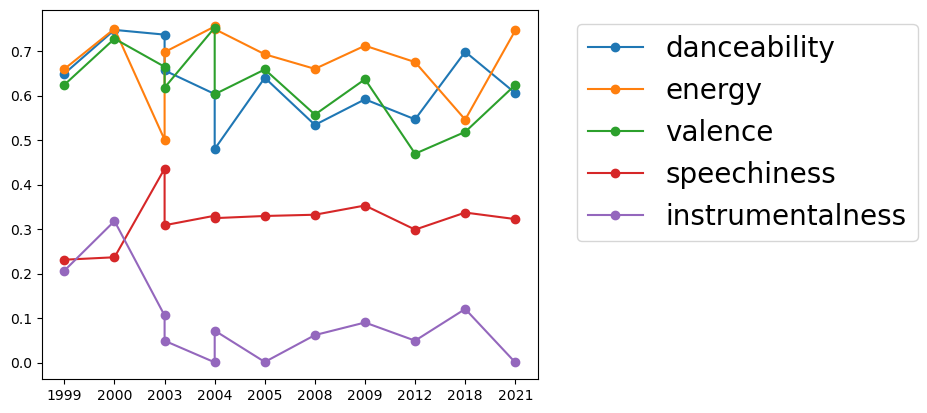

In [228]:
#This plot shows the change in different features over time
fig, ax = plt.subplots()
for i in analysisElements:
    if(i != "tempo" and i != "loudness"):
        ax.plot(albumsDf2["Release Date"],albumsDf2[i], marker="o",label=i)
        ax.legend(fontsize=20, bbox_to_anchor=(1.05, 1))
plt.savefig('featuresplot.png', format='png')


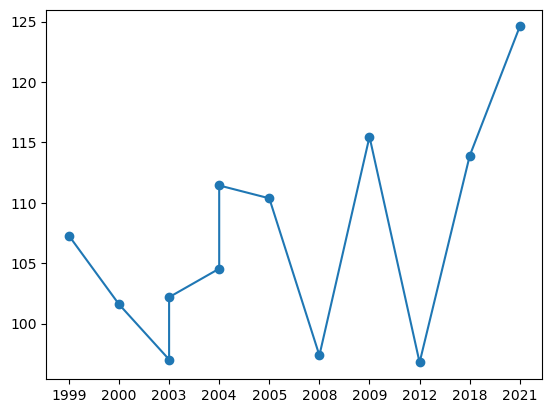

In [229]:
#This plot shows average tempo changes over time
fig, ax = plt.subplots()
ax.plot(albumsDf2["Release Date"],albumsDf2["tempo"], marker="o",label=i)
plt.savefig('tempoplot.png', format='png')


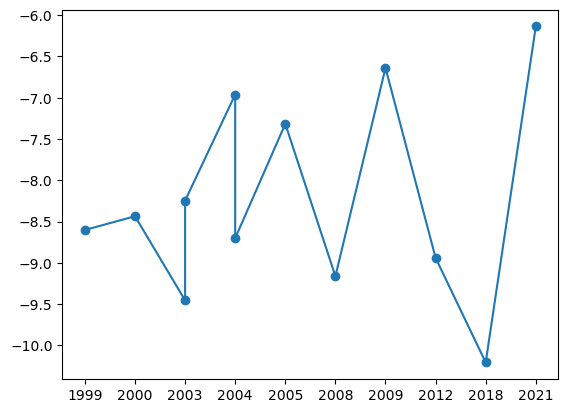

In [230]:
fig, ax = plt.subplots()
ax.plot(albumsDf2["Release Date"],albumsDf2["loudness"], marker="o",label=i)
plt.savefig('loudnessplot.png', format='png')


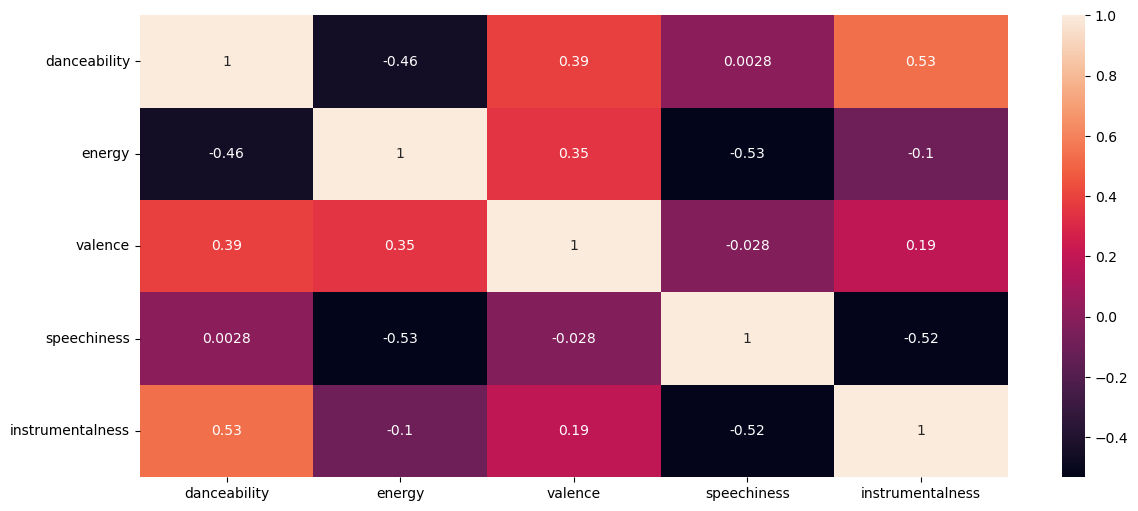

In [231]:
#This heatmap shows how variables are related to one another.
corrDf = albumsDf2.drop(["Album Name","Release Date","tempo","loudness"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corrDf,annot=True)
plt.savefig('heatmap.png', format='png')
